<a href="https://colab.research.google.com/github/mayanksreal/marks-evaluation/blob/main/deep_neural_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dependencies

In [179]:
from tensorflow.keras.datasets import mnist # type:ignore
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input # type:ignore
from tensorflow.keras.models import Sequential # type:ignore
from matplotlib import pyplot as plt

### Load Dataset

In [180]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

## Simple Neural Network

Let's try a single-layered neural network

### Building and training

In [3]:
model = Sequential()


model.add(Input(shape=(28,28)))
model.add(Flatten())

model.add(Dense(64, 'relu'))
model.add(Dropout(0.2))

model.add(Dense(10, 'softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8085 - loss: 0.6449 - val_accuracy: 0.9450 - val_loss: 0.1901
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9343 - loss: 0.2236 - val_accuracy: 0.9601 - val_loss: 0.1414
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9507 - loss: 0.1703 - val_accuracy: 0.9640 - val_loss: 0.1228
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9550 - loss: 0.1468 - val_accuracy: 0.9666 - val_loss: 0.1193
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9609 - loss: 0.1268 - val_accuracy: 0.9682 - val_loss: 0.1064
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9634 - loss: 0.1143 - val_accuracy: 0.9690 - val_loss: 0.1033
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9687 - loss: 0.1015 - val_accuracy: 0.9706 - val_loss: 0.1044
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9688 - loss: 0.0994 -

### Results

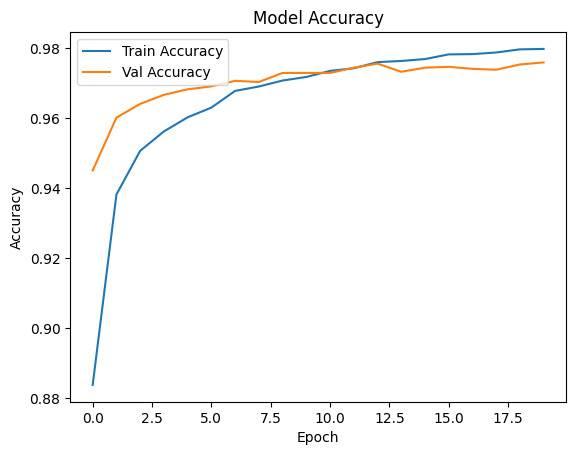

In [6]:
plt.plot(history.history['accuracy'][0:], label='Train Accuracy')
plt.plot(history.history['val_accuracy'][0:], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [5]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9696 - loss: 0.1180


[0.09707139432430267, 0.9742000102996826]

We can see from the plot that single-layer model begins to overfit after only 10 epochs, giving test accuracy of only 97%.

## Deep Neural Network

Let's try a deep neural network with several connected layers

### Building and training

In [7]:
model = Sequential()


model.add(Input(shape=(28,28)))
model.add(Flatten())

#Three fully connected layers

model.add(Dense(64, 'relu'))
model.add(Dropout(0.2))

model.add(Dense(64, 'relu'))
model.add(Dropout(0.2))

model.add(Dense(64, 'relu'))
model.add(Dropout(0.2))

model.add(Dense(10, 'softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7336 - loss: 0.8098 - val_accuracy: 0.9475 - val_loss: 0.1749
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9222 - loss: 0.2675 - val_accuracy: 0.9563 - val_loss: 0.1465
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9362 - loss: 0.2135 - val_accuracy: 0.9628 - val_loss: 0.1280
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9482 - loss: 0.1740 - val_accuracy: 0.9632 - val_loss: 0.1219
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9523 - loss: 0.1569 - val_accuracy: 0.9657 - val_loss: 0.1227
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9564 - loss: 0.1472 - val_accuracy: 0.9658 - val_loss: 0.1212
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9594 - loss: 0.1408 - val_accuracy: 0.9690 - val_loss: 0.1095
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9643 - loss: 0.1237 - 

### Results

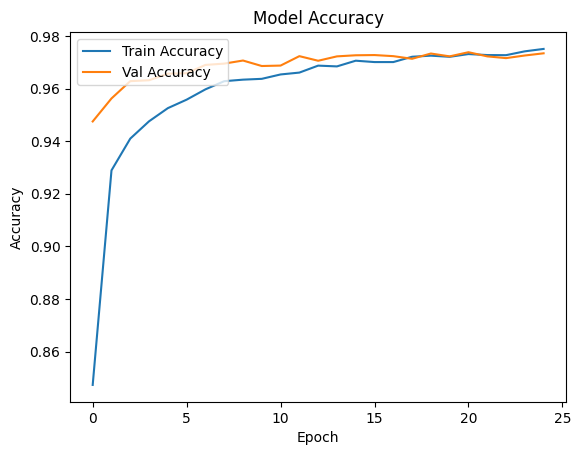

In [10]:
plt.plot(history.history['accuracy'][0:], label='Train Accuracy')
plt.plot(history.history['val_accuracy'][0:], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [9]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9686 - loss: 0.1145


[0.10163957625627518, 0.9729999899864197]

While the model took much longer to train and did not overfit until about 15 epochs, there was little to no improvement in test accuracy.

## Funneling Deep Neural Networks
Let's try a funneling deep neural network with increasingly smaller units in each dense layer.

### Building and training

In [11]:
model = Sequential()


model.add(Input(shape=(28,28)))
model.add(Flatten())

#Three fully connected layers

model.add(Dense(256, 'relu'))
model.add(Dropout(0.2))

model.add(Dense(128, 'relu'))
model.add(Dropout(0.2))

model.add(Dense(64, 'relu'))
model.add(Dropout(0.2))

model.add(Dense(10, 'softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8096 - loss: 0.5967 - val_accuracy: 0.9591 - val_loss: 0.1339
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9547 - loss: 0.1602 - val_accuracy: 0.9628 - val_loss: 0.1193
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9658 - loss: 0.1175 - val_accuracy: 0.9718 - val_loss: 0.0963
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9723 - loss: 0.0948 - val_accuracy: 0.9747 - val_loss: 0.0907
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9741 - loss: 0.0879 - val_accuracy: 0.9747 - val_loss: 0.0940
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9768 - loss: 0.0782 - val_accuracy: 0.9710 - val_loss: 0.1022
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9802 - loss: 0.0669 - val_accuracy: 0.9775 - val_loss: 0.0855
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9807 - loss: 0.0616 - 

### Results

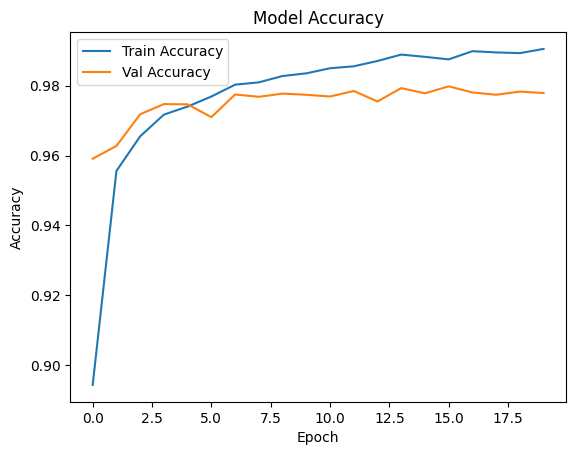

In [14]:
plt.plot(history.history['accuracy'][0:], label='Train Accuracy')
plt.plot(history.history['val_accuracy'][0:], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [13]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9788 - loss: 0.0989


[0.08355319499969482, 0.9818999767303467]

We can see that such a model gave substanially better results with upto 98% test accuracy only after 5 epochs of training, however after that model overfits

## Conclusion
We have tried very complex models already to no avail. Now we move on to CNNs which can acheive higher accuracies in simpler models

## Convolutional Neural Networks

Let's try a simple CNN on our dataset

### Building and training

Reshaping data for CNN

In [181]:
x_train, y_train = x_train.reshape(60000, 28,28,1) , y_train#.reshape(60000, 1)
x_test, y_test = x_test.reshape(10000, 28,28,1) , y_test#.reshape(10000, 1)

CNN Model

In [182]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D #type:ignore
from tensorflow.keras.callbacks import EarlyStopping

In [183]:
model = Sequential()

#model.add(Input(shape=(28,28,1)))

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(32, 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, 'softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [184]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, callbacks=[early_stopping])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8071 - loss: 0.6017 - val_accuracy: 0.9761 - val_loss: 0.0763
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9634 - loss: 0.1203 - val_accuracy: 0.9851 - val_loss: 0.0544
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9731 - loss: 0.0896 - val_accuracy: 0.9843 - val_loss: 0.0536
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9774 - loss: 0.0740 - val_accuracy: 0.9871 - val_loss: 0.0448
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9807 - loss: 0.0611 - val_accuracy: 0.9879 - val_loss: 0.0449
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9828 - loss: 0.0547 - val_accuracy: 0.9874 - val_loss: 0.0422
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9867 - loss: 0.0437 - val_accuracy: 0.9887 - val_loss: 0.0415
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9858 - loss: 0.0449 - 

### Results

In [185]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9875 - loss: 0.0375


[0.030756307765841484, 0.9901999831199646]

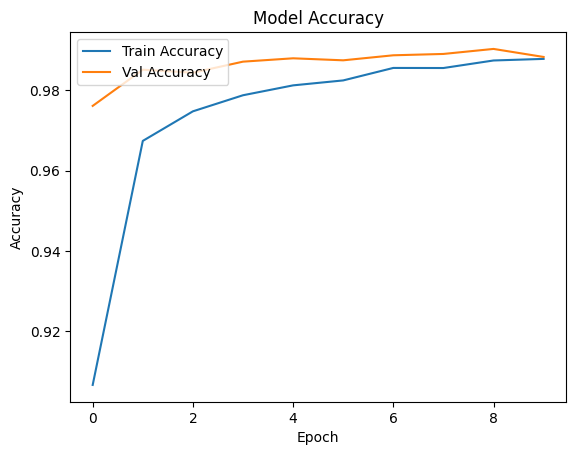

In [186]:
plt.plot(history.history['accuracy'][0:], label='Train Accuracy')
plt.plot(history.history['val_accuracy'][0:], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

CNN gives, about same or higher result metrics for much less training times and simpler model